# Simple linear regression analysis

*2023-09-24*

## Summary

The aim of this deck was to show how to perform a simple linear regression analysis on some data.
Data on the height, diameter, and side of the road (*east* or *west*) of 42 manna ash trees were collected and analysed.
An exploratory data analysis of the data was carried out, and a simple linear regression analysis was performed.

## Main

Import the dependencies.

In [1]:
import pandas as pd
from scipy import stats as st
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

Set the graphing defaults.

In [2]:
sns.set_theme()

Load the data.

In [3]:
manna_ash = pd.read_parquet("../Data/manna_ash.parquet")

Describe the `DataFrame`.

In [4]:
manna_ash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tree_id   42 non-null     int64  
 1   diameter  42 non-null     float64
 2   height    42 non-null     int64  
 3   side      42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Preview the `DataFrame`.

In [5]:
manna_ash.head()

,tree_id,diameter,height,side
0,271,0.23,9,west
1,270,0.21,8,west
2,269,0.20,7,west
3,268,0.21,8,west
4,272,0.21,9,west


### Exploratory data analysis

#### Univariate analysis

Plot a bar chart of the number of trees observed by `side`.

**Result:**
The bar chart shows that there are approximately three times as many trees observed on the west side of the road compared to the east side of the road.

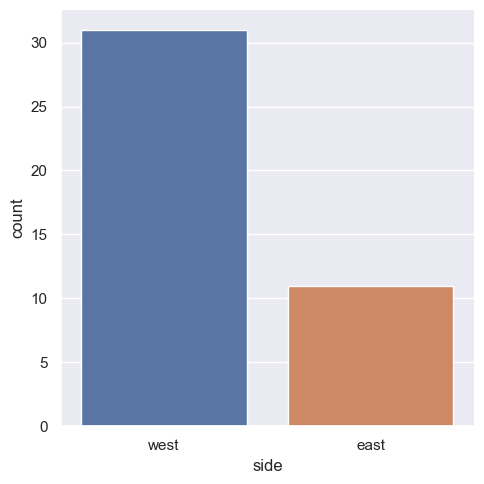

In [6]:
manna_ash[["side"]].value_counts().reset_index().pipe(
    sns.catplot, x="side", y="count", kind="bar"
)

Plot a histogram of `height`.

**Result:**
The data is unimodal and left-skew with a peak at the 9-10 bin.

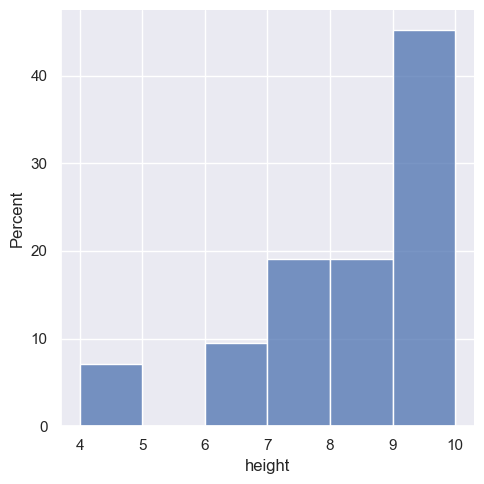

In [7]:
manna_ash.pipe(sns.displot, x="height", stat="percent", binwidth=1)

#### Bivariate analysis

Plot a histogram of `height` stratified by `side`.

**Result:**

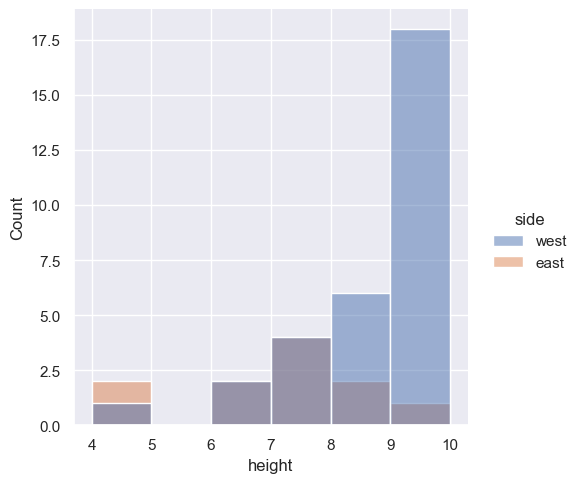

In [8]:
manna_ash.pipe(sns.displot, x="height", hue="side", binwidth=1)

Plot comparative boxplot of `height` stratified by `side`.

**Result:**

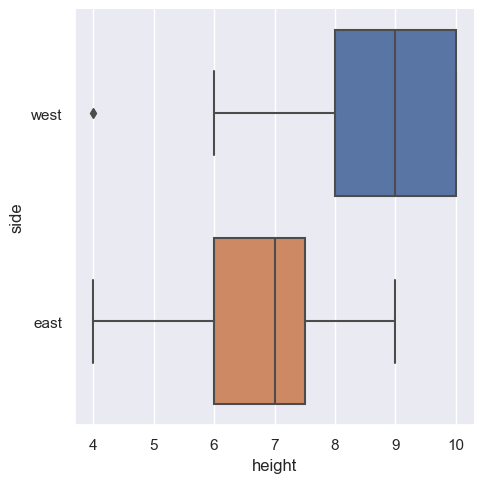

In [9]:
manna_ash.pipe(sns.catplot, x="height", y="side", kind="box")

Plot a histogram of `diameter` stratified by `side`.

**Result:**

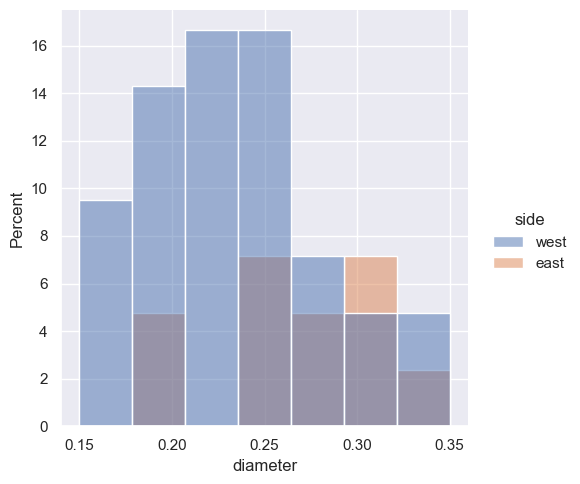

In [10]:
manna_ash.pipe(sns.displot, x="diameter", hue="side", stat="percent")

Plot comparative boxplot of `diameter` stratified by `side`.

**Result:**

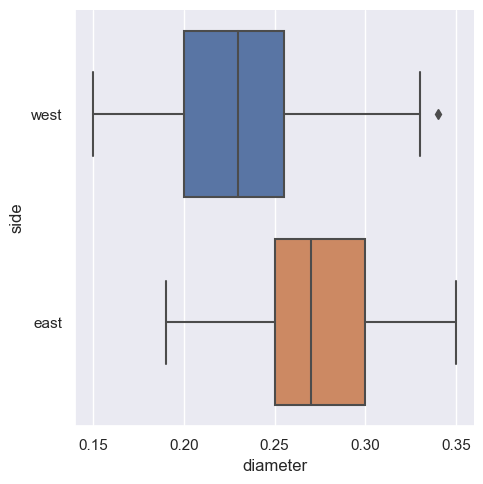

In [11]:
manna_ash.pipe(sns.catplot, x="diameter", y="side", kind="box")

Report the correlation of `height` and `diameter`.

**Result:**

In [12]:
st.pearsonr(manna_ash["height"], manna_ash["diameter"])

PearsonRResult(statistic=0.3627710547494399, pvalue=0.018219010713435492)

There is evidence that the height of trees may be confounded by the side of the road the trees are placed.

In [13]:
st.mannwhitneyu(
    manna_ash.query("side == 'west'")["height"],
    manna_ash.query("side == 'east'")["height"]
)

MannwhitneyuResult(statistic=279.0, pvalue=0.0016339591033292895)

### Model the data

#### Fit the model

Model `height ~ diameter` and fit the data.

In [14]:
model = sm.OLS.from_formula("height ~ diameter", manna_ash)
result = model.fit()

Summarise the fitted model.

**Result:**

In [15]:
print(result.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.110
No. Observations:                  42   F-statistic:                     6.062
Covariance Type:            nonrobust   Prob (F-statistic):             0.0182
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0500      1.233      4.094      0.000       2.557       7.543
diameter      12.2692      4.983      2.462      0.018       2.198      22.341

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


#### Check the assumptions

Summarise the residual values.

**Result:**

In [16]:
result.resid.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
0,42.0,-6.978545e-16,1.600727,-3.503827,-1.213924,0.198672,1.128095,2.741558


Plot a residual plot of residual against fitted value and normal probability plot of the residuals.

**Result:**

Text(0.5, 0, 'Fitted value')

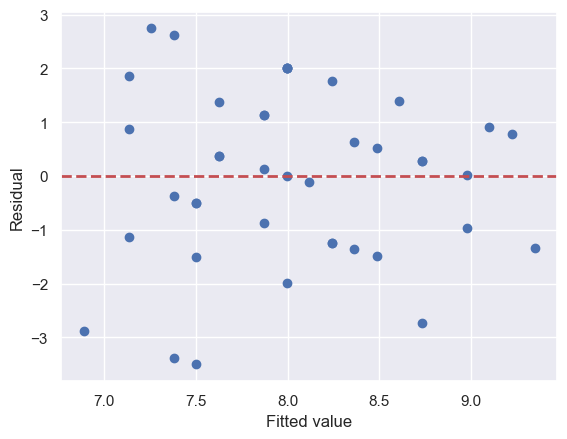

In [17]:
# Residual plot
plt.scatter(result.fittedvalues, result.resid)
plt.axhline(y=0, lw=2, ls="--", color="r")
plt.ylabel("Residual")
plt.xlabel("Fitted value")

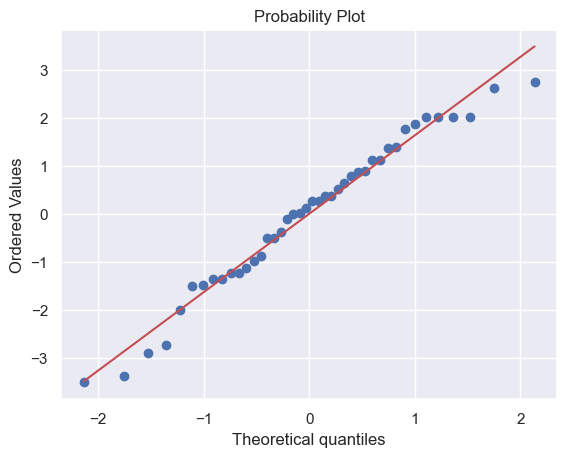

In [18]:
# Normal probability plot
_ = st.probplot(result.resid, plot=plt)

#### Use the model

Predict the height of a tree with a diameter of 0.25m.

**Result:**
The predicted height is 7.5m with 95% prediction interval (4.2, 10.8).

In [19]:
result.get_prediction(pd.DataFrame({"diameter": [0.2]})).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.503827,0.327317,6.842294,8.16536,4.16231,10.845345
